# Fourier Transform

### import package

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from numpy import array,sqrt,cos,sin,abs,pi,exp
from numpy.linalg import inv
from numpy.random import random

from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline
from scipy.fft import fft, fftfreq

plt.plot()
plt.close()

In [2]:
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 13,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsfonts}",
    "figure.dpi": 300,
    "figure.figsize": (12,5),
    "lines.linewidth": 1,
    "lines.markersize": 3
})

In [3]:
# 顯示所有 csv 檔案
!ls data

2023-6-12-20-53.csv 2023-6-12-22-3.csv  2023-6-13-11-11.csv 2023-6-13-12-1.csv
2023-6-12-21-0.csv  2023-6-12-22-37.csv 2023-6-13-11-9.csv  2023-6-13-12-2.csv
2023-6-12-21-10.csv 2023-6-13-11-10.csv 2023-6-13-12-0.csv


### Read CSV data

In [4]:
# 讀取資料
name = "2023-6-12-22-3"

directory = f"result/{name}"
if not os.path.exists(directory):
    os.makedirs(directory)
    
data = pd.read_csv(f"./data/{name}.csv", header=None) 

# 楚存資料
time_sec_ = data[0].to_numpy()  # (sec)
x1_laser_ = data[1].to_numpy() *  0.01 # (cm -> m)
x2_laser_ = data[2].to_numpy() * -0.01 # (cm -> m)
x1_sound_ = data[3].to_numpy() *  0.01 # (cm -> m)
x2_sound_ = data[4].to_numpy() * -0.01 # (cm -> m)

x1_laser_ = x1_laser_ - np.mean(x1_laser_)
x2_laser_ = x2_laser_ - np.mean(x2_laser_)
x1_sound_ = x1_sound_ - np.mean(x1_sound_)
x2_sound_ = x2_sound_ - np.mean(x2_sound_)

# 時間平移，第一項為 0 
time_sec_ = time_sec_ - time_sec_[0]


# 數據平滑
win_size = 5
x1 = savgol_filter(x1_sound_, win_size, 3)
x2 = savgol_filter(x2_sound_, win_size, 3)

# 數據差值
x1_spline = CubicSpline(time_sec_, x1)
x2_spline = CubicSpline(time_sec_, x2)

### Plot original data ( not shifted )

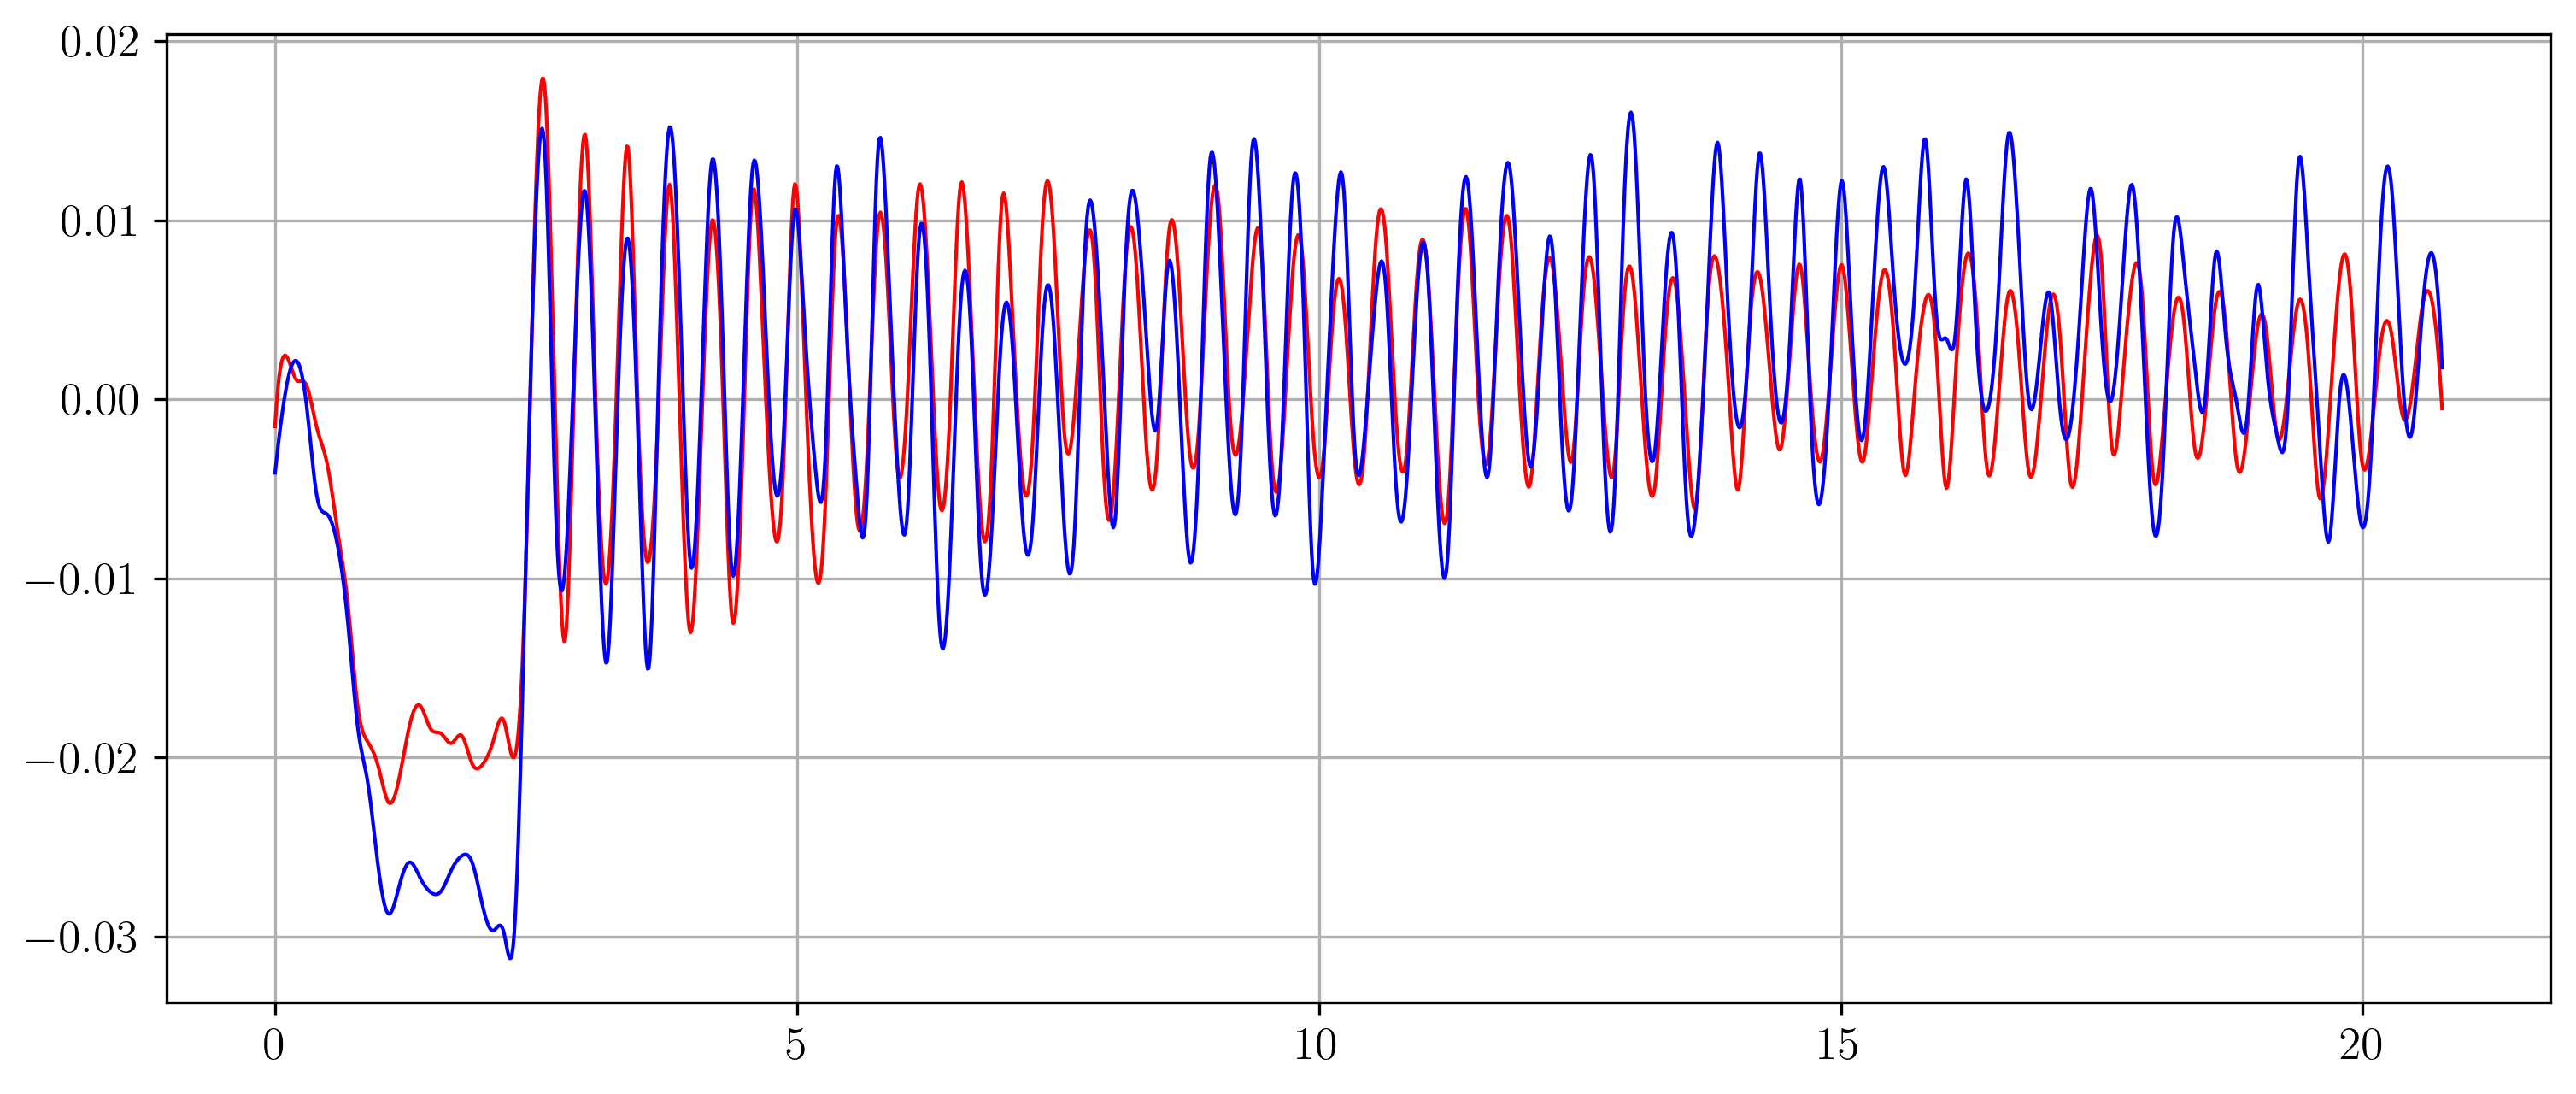

In [5]:
t = np.arange(0,max(time_sec_),0.01)
plt.plot(t,x1_spline(t),'-',color='red')
plt.plot(t,x2_spline(t),'-',color='blue')
plt.grid()
plt.show()

# Plot data near start time

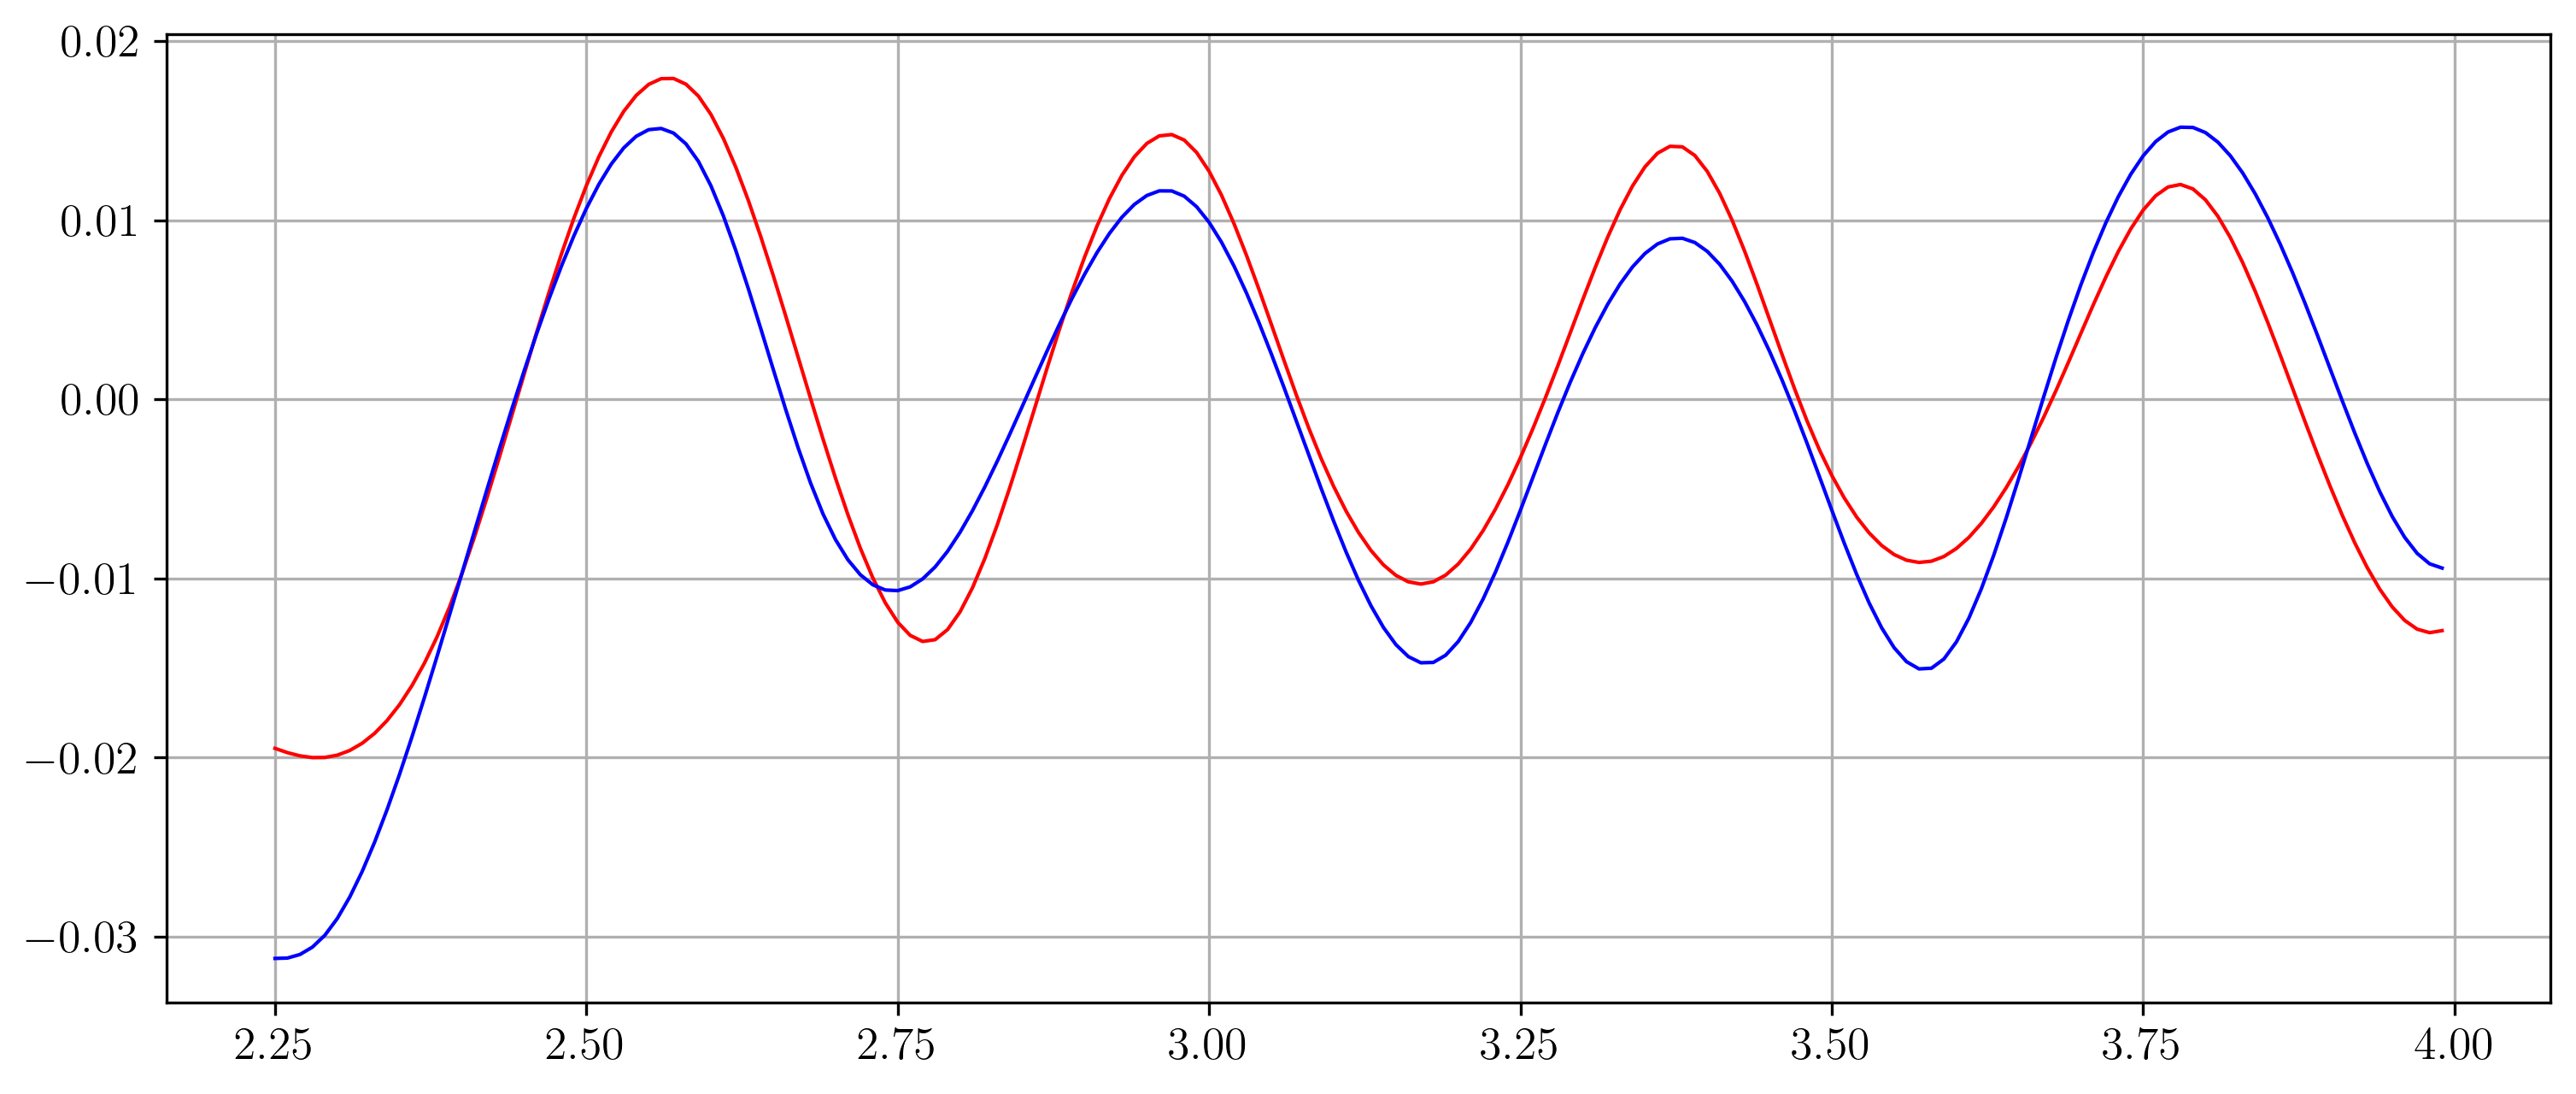

In [6]:
t_min = 2.25
t_max = 4.0
t = np.arange(t_min,t_max,0.01)
plt.plot(t,x1_spline(t),'-',color='red')
plt.plot(t,x2_spline(t),'-',color='blue')
plt.grid()
plt.show()

choose $t_0$

In [7]:
t0 = 2.39

t0_index = np.argmax(time_sec_ > t0)

time_sec = time_sec_[t0_index:]
x1_laser = x1_laser_[t0_index:]
x2_laser = x2_laser_[t0_index:]
x1_sound = x1_sound_[t0_index:]
x2_sound = x2_sound_[t0_index:]

# 時間平移，第一項為 0 
time_sec = time_sec - time_sec[0]

# 數據平滑
win_size = 5
x1 = savgol_filter(x1_sound, win_size, 3)
x2 = savgol_filter(x2_sound, win_size, 3)

# 數據差值
x1_spline = CubicSpline(time_sec, x1)
x2_spline = CubicSpline(time_sec, x2)

### plot shifted data

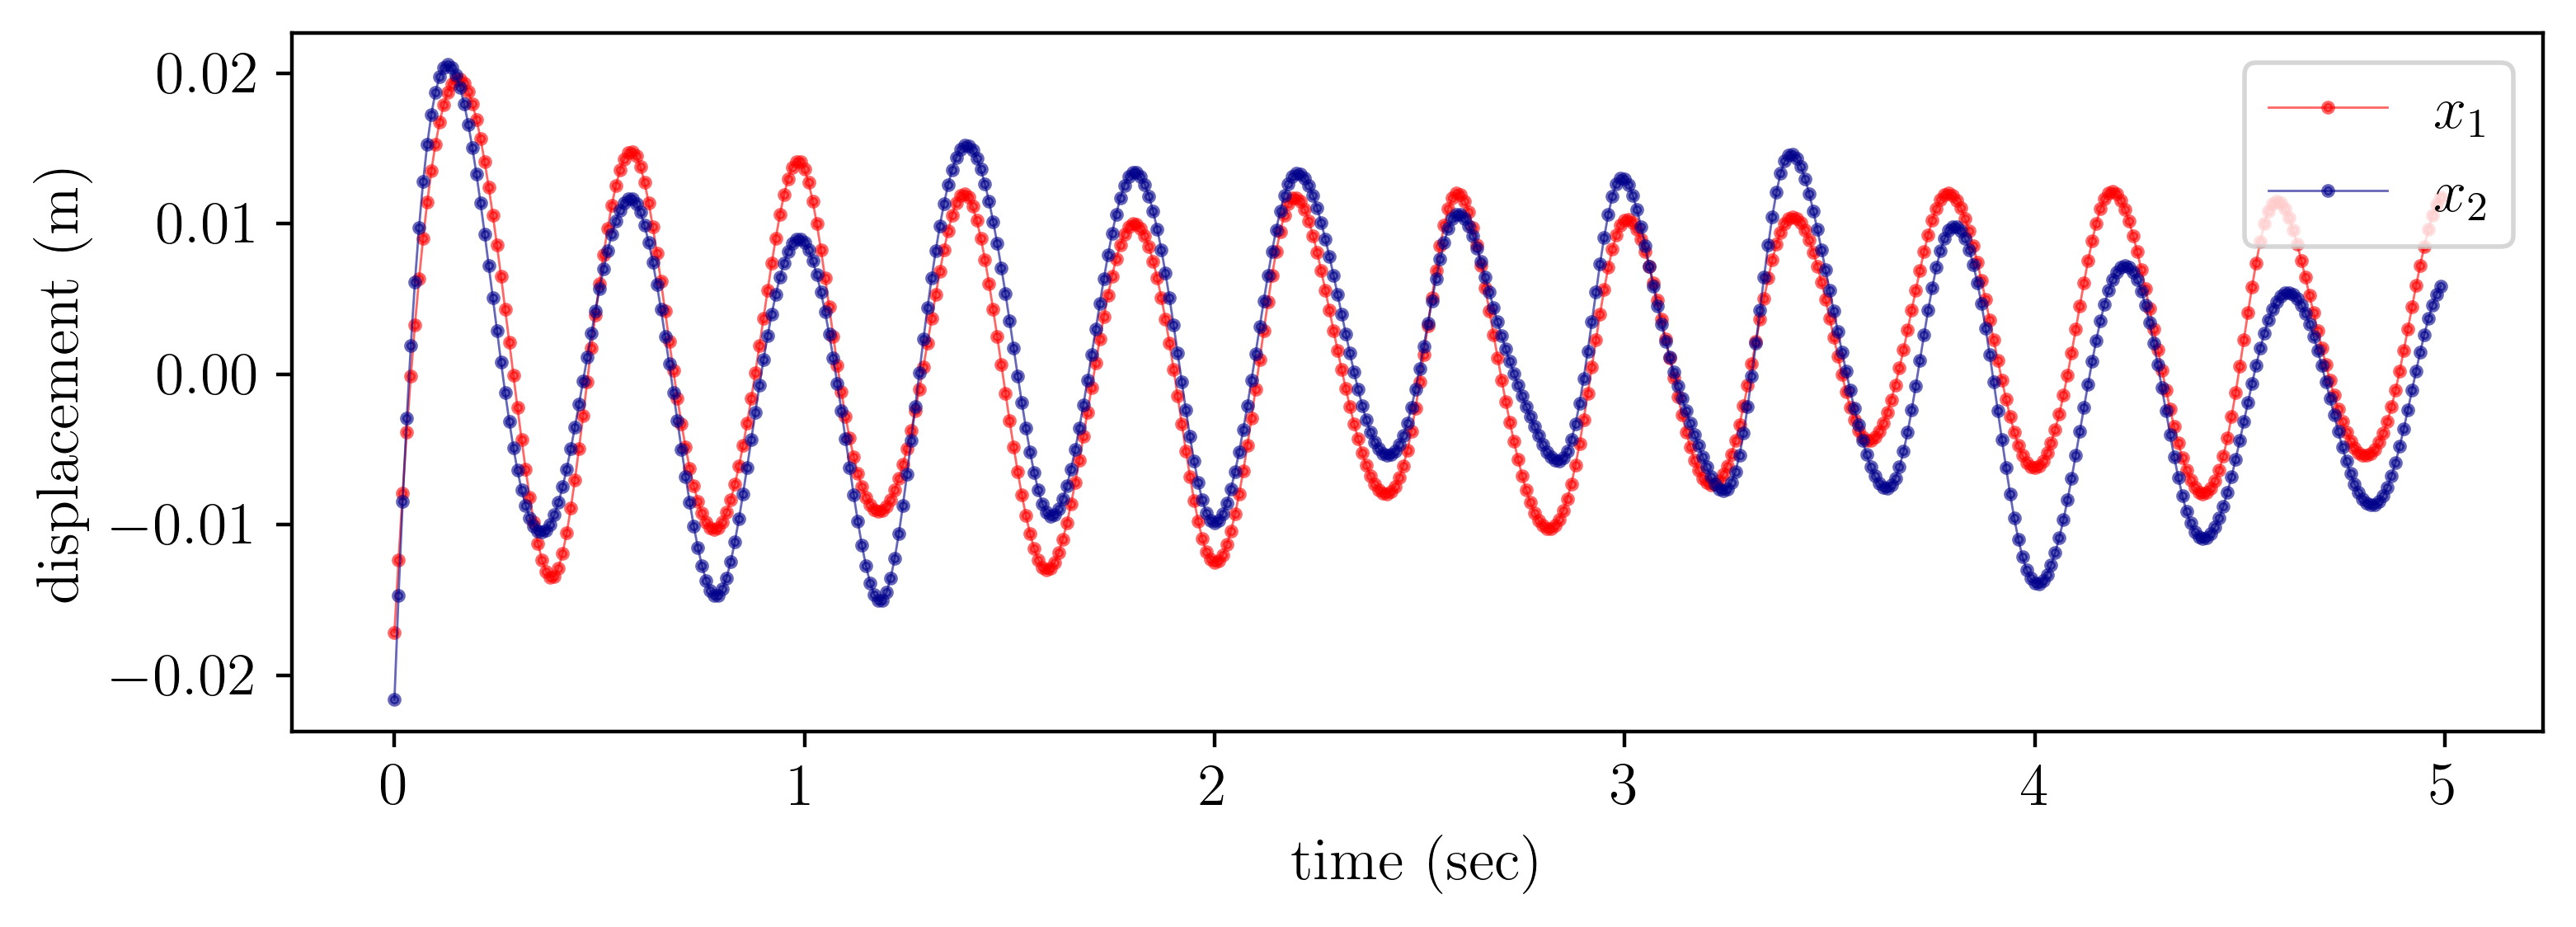

In [8]:
fig1 = plt.figure(figsize=(8,3), dpi=400)

t = np.arange(0,5,0.01)
plt.plot(t,x1_spline(t),'-o', color='red',alpha=0.6,label="$x_1$",markersize=2,linewidth=0.5)
plt.plot(t,x2_spline(t),'-o',color='darkblue',alpha=0.6,label="$x_2$",markersize=2,linewidth=0.5)
plt.ylabel("displacement (m)")
plt.xlabel("time (sec)")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

fig1.savefig(f"result/{name}/fig1.pdf")
fig1.savefig(f"result/{name}/fig1.svg", format="svg")

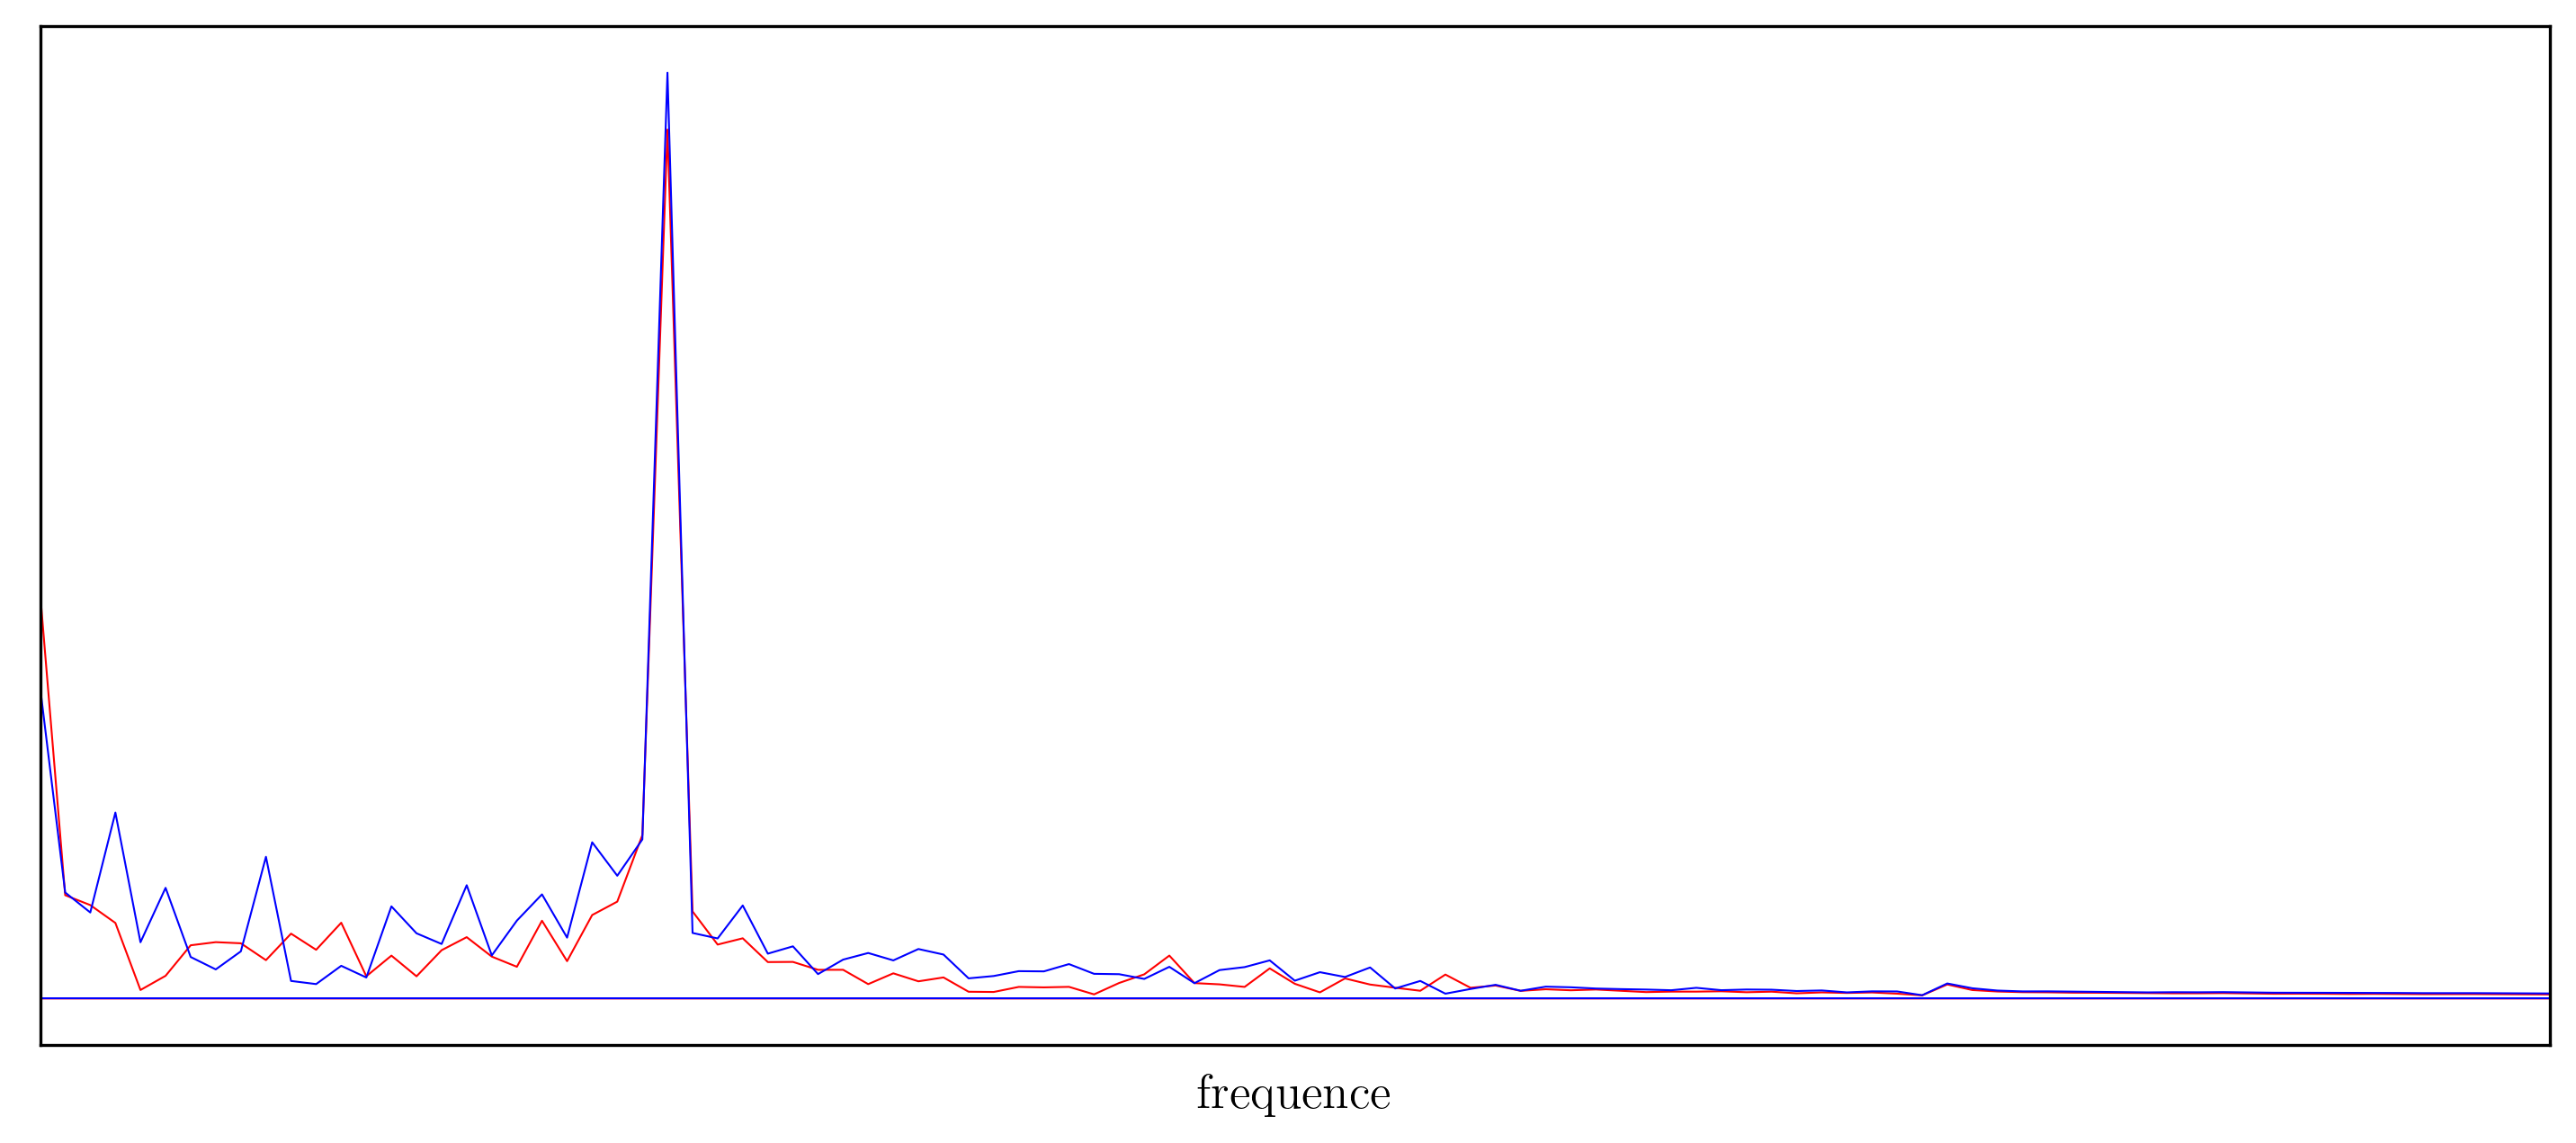

In [9]:
dt = 0.01
t = np.arange(0, 10, dt)
f = fftfreq(t.size, dt)
A1 = fft(x1_spline(t))
A2 = fft(x2_spline(t))

# fig = plt.figure(dpi=50)
plt.plot(f, np.abs(A1), color='red',linewidth=0.5)
plt.plot(f, np.abs(A2), color='blue',linewidth=0.5)
plt.xlim(0,10)
plt.xticks([])
plt.yticks([])
plt.xlabel("frequence")
plt.show()

In [33]:
def Q_transform(t, y,sigma=None):
    if(len(t)!=len(y)): 
        raise ValueError('The length of t must match length of y.')
    n = len(t)
    f = fftfreq(n, dt)
    Q = np.zeros([n//2,n])
    if not sigma:
        sigma = sqrt(n)/10
    
    for i in range(n):
        w = exp(-(t-t[i])**2/sigma)
        A = np.abs(fft(y*w))
        Q[:,i] = A[n//2:]
    return Q

def ticks(x):
    n = len(x)
    label = np.linspace(0, n - 1, 6, dtype=int)
    pos = (label/n) * x[label]
    pos = np.floor(pos*100)/100
    return label,pos

In [11]:
# 讀取資料
name = "2023-6-12-22-3"

directory = f"result/{name}"
if not os.path.exists(directory):
    os.makedirs(directory)
    
data = pd.read_csv(f"./data/{name}.csv", header=None) 

# 楚存資料
time_sec_ = data[0].to_numpy()  # (sec)
x1_laser_ = data[1].to_numpy() *  0.01 # (cm -> m)
x2_laser_ = data[2].to_numpy() * -0.01 # (cm -> m)
x1_sound_ = data[3].to_numpy() *  0.01 # (cm -> m)
x2_sound_ = data[4].to_numpy() * -0.01 # (cm -> m)

x1_laser_ = x1_laser_ - np.mean(x1_laser_)
x2_laser_ = x2_laser_ - np.mean(x2_laser_)
x1_sound_ = x1_sound_ - np.mean(x1_sound_)
x2_sound_ = x2_sound_ - np.mean(x2_sound_)

# 時間平移，第一項為 0 
time_sec_ = time_sec_ - time_sec_[0]


# 數據平滑
win_size = 5
x1 = savgol_filter(x1_sound_, win_size, 3)
x2 = savgol_filter(x2_sound_, win_size, 3)

# 數據差值
x1_spline = CubicSpline(time_sec_, x1)
x2_spline = CubicSpline(time_sec_, x2)

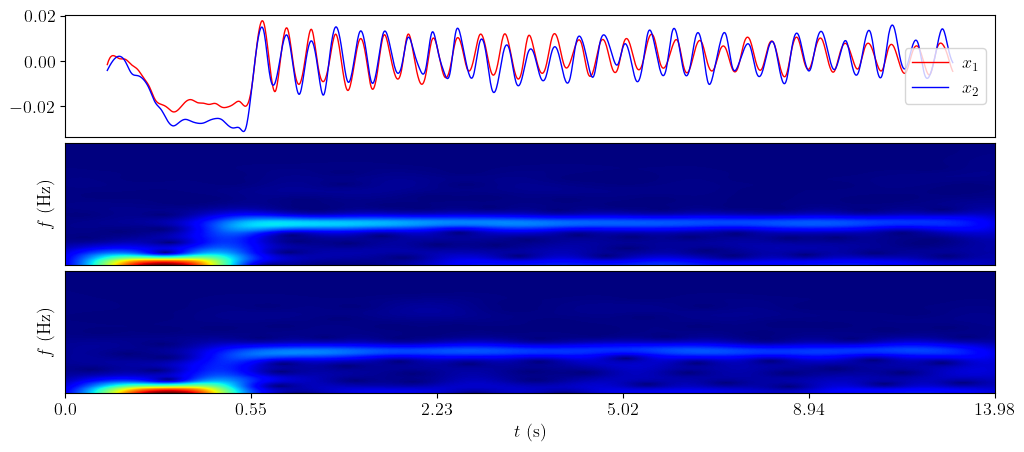

In [67]:
dt = 0.01
t = np.arange(0, 14, dt)
x1_data = x1_spline(t)
x2_data = x2_spline(t)
Q1 = Q_transform(t,x1_data,sigma=0.5)
Q2 = Q_transform(t,x2_data,sigma=0.5)
(xlabel,xpos) = ticks(t)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,5), dpi=100)
ax1.plot(t, x1_data, color='red',linewidth=1, label='$x_1$')
ax1.plot(t, x2_data, color='blue',linewidth=1, label='$x_2$')
ax1.legend(loc='right')
ax1.set_xticks([])

ax2.imshow(np.flip(Q1[600:,:],0), cmap='jet', origin='lower')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel("$f$ (Hz)")
ax2.set_aspect('auto')

ax3.imshow(np.flip(Q2[600:,:],0), cmap='jet', origin='lower')
ax3.set_xticks(xlabel,xpos)
ax3.set_yticks([])
ax3.set_ylabel("$f$ (Hz)")
ax3.set_xlabel("$t$ (s)")
ax3.set_aspect('auto')

plt.subplots_adjust(hspace=0.05)
plt.show()